In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
dict_dtype = {'Item_Number':str,
'Bottle_Volume (ml)':int,
'Bottles_Sold':int,
'Bottle_Retail':float,
'Store_Number':int}

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [5]:
categories_items_df = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\categories_items.csv',dtype={'Category':str,'Item_Number':str},index_col=0)

In [6]:
categories_items_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4472 entries, 0 to 4471
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Item_Number        4472 non-null   object
 1   Item_Description   4472 non-null   object
 2   Category           4472 non-null   object
 3   Category_Name      4472 non-null   object
 4   New_Category_Name  4472 non-null   object
dtypes: object(5)
memory usage: 209.6+ KB


In [7]:
categories_items_df = categories_items_df.drop(columns=['Item_Description'])

In [8]:
pdtypes = {'Item Number':str,'Vendor':str}

In [9]:
products_iowa = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\Iowa_Liquor_Products(1).csv',dtype=pdtypes)

In [10]:
list(products_iowa.columns)

['Item Number',
 'Category Name',
 'Item Description',
 'Vendor',
 'Vendor Name',
 'Bottle Volume (ml)',
 'Pack',
 'Inner Pack',
 'Age',
 'Proof',
 'List Date',
 'UPC',
 'SCC',
 'State Bottle Cost',
 'State Case Cost',
 'State Bottle Retail',
 'Report Date']

In [11]:
products_iowa = products_iowa.drop(columns=['Item Description'])

In [12]:
# products_iowa2 = products_iowa[['Item Number','Bottle Volume (ml)','State Bottle Retail','State Bottle Cost']]

In [13]:
products = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\clustering_data_num_unique_stores.csv',dtype=dict_dtype, index_col=0)

In [14]:
products.Item_Number.value_counts().sort_values() 

72911     1
100216    1
100433    1
100423    1
100413    1
         ..
999918    1
999924    1
30016     2
89320     2
73811     2
Name: Item_Number, Length: 4472, dtype: int64

In [15]:
products.loc[products.Item_Number == '30016']

,Item_Number,Item_Description,Bottle_Volume,New_Category_Name,Bottle_Retail,Bottles_Sold,Store_Number,Sales
846,30016,Foundry Gin,375,Gin,9.99,789,41,7882.11
847,30016,Foundry Gin,750,Gin,9.99,119,10,1188.81


In [16]:
products.rename({'Store_Number':'Num_Stores_Selling', 'Sales':'revenue'} ,axis=1, inplace=True)
              

In [17]:
combine_projects = products[['Item_Number', 'Item_Description', 'Bottles_Sold', 'Num_Stores_Selling']].merge(products_iowa, left_on ='Item_Number', right_on = 'Item Number')

In [18]:
combine_projects.columns

Index(['Item_Number', 'Item_Description', 'Bottles_Sold', 'Num_Stores_Selling',
       'Item Number', 'Category Name', 'Vendor', 'Vendor Name',
       'Bottle Volume (ml)', 'Pack', 'Inner Pack', 'Age', 'Proof', 'List Date',
       'UPC', 'SCC', 'State Bottle Cost', 'State Case Cost',
       'State Bottle Retail', 'Report Date'],
      dtype='object')

In [19]:
combine_projects = combine_projects.drop(columns=['Item Number','Vendor','Vendor Name','Pack', 'Inner Pack', 'Age',
        'List Date', 'UPC', 'SCC','Report Date'])

In [20]:
combine_projects.shape

(4474, 10)

identify and clean duplicates

In [21]:
combine_projects.Item_Number.value_counts().sort_values()

72911     1
101104    1
100216    1
100433    1
100423    1
         ..
999918    1
999924    1
30016     2
89320     2
73811     2
Name: Item_Number, Length: 4471, dtype: int64

In [22]:
dupes =['30016','89320','73811']

create DataFrame that excludes duplicated item numbers

In [23]:
# create DataFrame that excludes duplicated item numbers

combine_projects_ex = combine_projects.loc[~combine_projects.Item_Number.isin(dupes),:]
combine_projects_ex.shape

(4468, 10)

create DataFrame of rows with duplicated item numbers


In [24]:
combine_projects_dupes = combine_projects.loc[combine_projects.Item_Number.isin(dupes),:]
combine_projects_dupes.shape

(6, 10)

In [25]:
list(combine_projects_dupes.columns)

['Item_Number',
 'Item_Description',
 'Bottles_Sold',
 'Num_Stores_Selling',
 'Category Name',
 'Bottle Volume (ml)',
 'Proof',
 'State Bottle Cost',
 'State Case Cost',
 'State Bottle Retail']

In [26]:
combine_projects_dupes.columns

Index(['Item_Number', 'Item_Description', 'Bottles_Sold', 'Num_Stores_Selling',
       'Category Name', 'Bottle Volume (ml)', 'Proof', 'State Bottle Cost',
       'State Case Cost', 'State Bottle Retail'],
      dtype='object')

clean up duplicates

In [27]:
cleaned_dupes_df = combine_projects_dupes.groupby(['Item_Number', 'Item_Description',
       'Category Name', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Case Cost', 'State Bottle Retail']).agg({'Bottles_Sold':'sum',
                                                                            'Num_Stores_Selling':'sum'}).reset_index()

concatenate combine_projects_ex which excludes duplicates with cleaned_dupes_df

In [28]:
new_combine_proj_df = pd.concat([combine_projects_ex,cleaned_dupes_df])

In [29]:
new_combine_proj_df.shape #shape checks out

(4471, 10)

In [30]:
# new_combine_proj_df = new_combine_proj_df.drop(columns=['Item Description'])

In [31]:
new_combine_proj_df.rename({'Bottle Volume (ml)':'Bottle_Volume','State Bottle Retail':'Bottle_Retail' } ,axis=1, inplace=True)

check missing values

In [32]:
from missing_columns_pd import miss_cols

In [33]:
miss_cols(new_combine_proj_df)

[('Proof', 3, 0.0007)]

In [34]:
new_combine_proj_df.Proof.median()

80.0

In [35]:
new_combine_proj_df['Proof'].fillna(new_combine_proj_df.Proof.median())

0       66.0
1       80.0
2       94.0
3       80.0
4       80.0
        ... 
4472    90.0
4473    90.0
0       80.0
1       80.0
2       80.0
Name: Proof, Length: 4471, dtype: float64

In [36]:
new_combine_proj_df['Proof'] = new_combine_proj_df['Proof'].fillna(new_combine_proj_df.Proof.median())

In [37]:
products = new_combine_proj_df.merge(categories_items_df,right_on='Item_Number',left_on='Item_Number')
products.shape

(4471, 13)

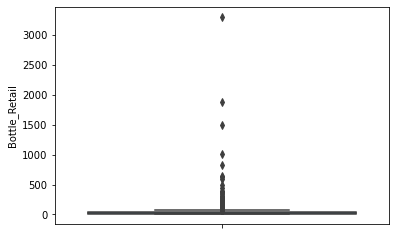

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot( y=products["Bottle_Retail"] );
plt.show()

In [39]:
products2 = products.copy()

In [40]:
products2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4471 entries, 0 to 4470
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Item_Number         4471 non-null   object 
 1   Item_Description    4471 non-null   object 
 2   Bottles_Sold        4471 non-null   int32  
 3   Num_Stores_Selling  4471 non-null   int32  
 4   Category Name       4471 non-null   object 
 5   Bottle_Volume       4471 non-null   int64  
 6   Proof               4471 non-null   float64
 7   State Bottle Cost   4471 non-null   float64
 8   State Case Cost     4471 non-null   float64
 9   Bottle_Retail       4471 non-null   float64
 10  Category            4471 non-null   object 
 11  Category_Name       4471 non-null   object 
 12  New_Category_Name   4471 non-null   object 
dtypes: float64(4), int32(2), int64(1), object(6)
memory usage: 454.1+ KB


In [41]:
products.describe()

,Bottles_Sold,Num_Stores_Selling,Bottle_Volume,Proof,State Bottle Cost,State Case Cost,Bottle_Retail
count,4.471000e+03,4471.000000,4471.000000,4471.000000,4471.000000,4471.000000,4471.000000
mean,6.936512e+03,125.356072,792.460971,75.147618,21.081058,138.906929,31.628141
std,3.973952e+04,214.295687,410.860733,21.313410,48.613978,120.611650,72.920898
min,1.000000e+00,1.000000,20.000000,19.000000,0.660000,18.000000,0.990000
25%,5.250000e+01,3.000000,750.000000,70.000000,7.875000,75.000000,11.815000
50%,5.480000e+02,49.000000,750.000000,80.000000,13.520000,108.240000,20.280000
75%,3.626500e+03,154.500000,750.000000,86.000000,23.500000,165.570000,35.250000
max,2.105088e+06,1725.000000,5250.000000,190.000000,2198.890000,2198.890000,3298.340000


In [42]:
products.shape

(4471, 13)

<AxesSubplot:xlabel='Bottle_Retail', ylabel='Count'>

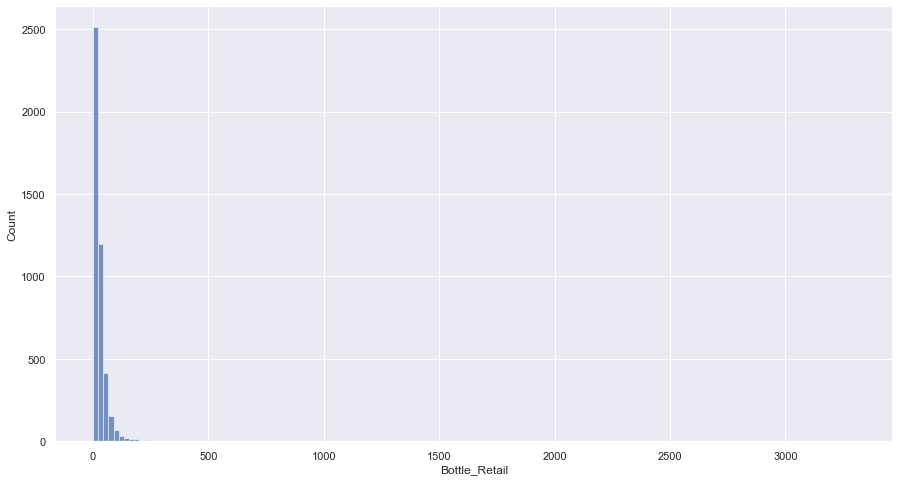

In [43]:
gph = sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(products['Bottle_Retail'], bins=150)


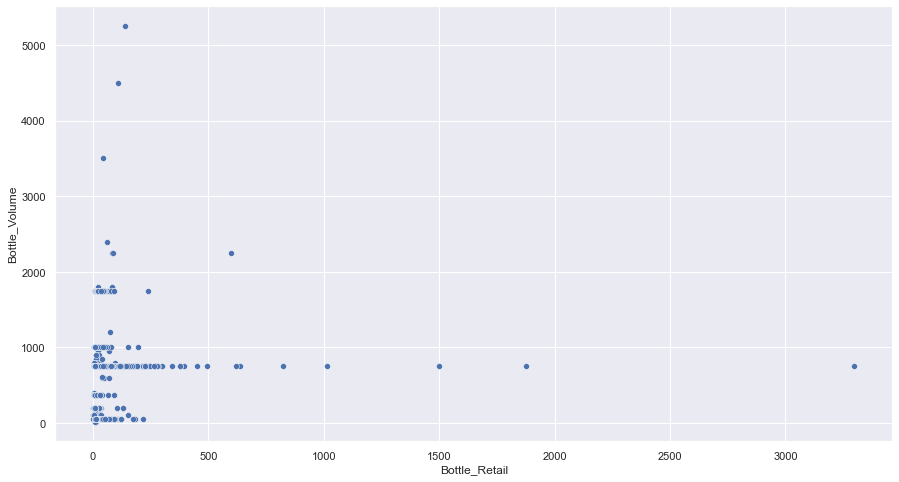

In [44]:
# products.plot.scatter(x='Bottle_Volume', y='Bottle_Retail')
gph = sns.set(rc = {'figure.figsize':(15,8)})
gfg = sns.scatterplot(data=products, x='Bottle_Retail', y='Bottle_Volume')
# gfg.set_ylim(0, 80)
# gph.set_xlim(0.98,3000)
# gph.set_xticks(range(0.98,3000))
plt.show()

In [45]:
products.Bottle_Retail.corr((products.Bottle_Volume))

0.012357040712554675

In [46]:
products.Bottle_Retail.corr((products.Bottles_Sold))

-0.04238487486136195

In [47]:
products.Bottles_Sold.corr((products.Bottle_Volume))

-0.00019054319178971472

In [48]:
products.Bottles_Sold.corr((products.Num_Stores_Selling))

0.45376397568801763

In [49]:
filt = products.Bottle_Retail > 1400
products[filt]

,Item_Number,Item_Description,Bottles_Sold,Num_Stores_Selling,Category Name,Bottle_Volume,Proof,State Bottle Cost,State Case Cost,Bottle_Retail,Category,Category_Name,New_Category_Name
1633,48725,Remy Martin Louis XIII,17,12,Imported Brandies,750,80.0,2198.89,2198.89,3298.34,1052100,Imported Brandies,Brandies
3323,917673,HA Double Eagle Very Rare,2,2,Straight Bourbon Whiskies,750,101.0,1000.00,1000.00,1500.00,1011200,Straight Bourbon Whiskies,Bourbon
3360,919976,HA OFC Bourbon 1995,10,10,Straight Bourbon Whiskies,750,90.0,1250.00,1250.00,1875.00,1011200,Straight Bourbon Whiskies,Bourbon


In [50]:
filt2 = products.Bottle_Volume > 3000
products[filt2]

,Item_Number,Item_Description,Bottles_Sold,Num_Stores_Selling,Category Name,Bottle_Volume,Proof,State Bottle Cost,State Case Cost,Bottle_Retail,Category,Category_Name,New_Category_Name
0,100015,Fireball Cinnamon Whiskey Bag in Box,1123,129,Whiskey Liqueur,3500,66.0,30.0,90.0,45.0,1081600,Whiskey Liqueur,Whiskey Liqueur
139,101515,Fireball Cinnamon Whiskey Keg,180,141,Temporary & Specialty Packages,5250,66.0,92.0,92.0,138.0,1701100,Temporary & Specialty Packages,Temporary & Specialty Packages
155,101665,Stumpys Spirits Cocktail Collection Gift Set,115,26,Temporary & Specialty Packages,4500,25.0,72.0,72.0,108.0,1701100,Temporary & Specialty Packages,Temporary & Specialty Packages


In [51]:
np.sum(products.Bottles_Sold)

31013146

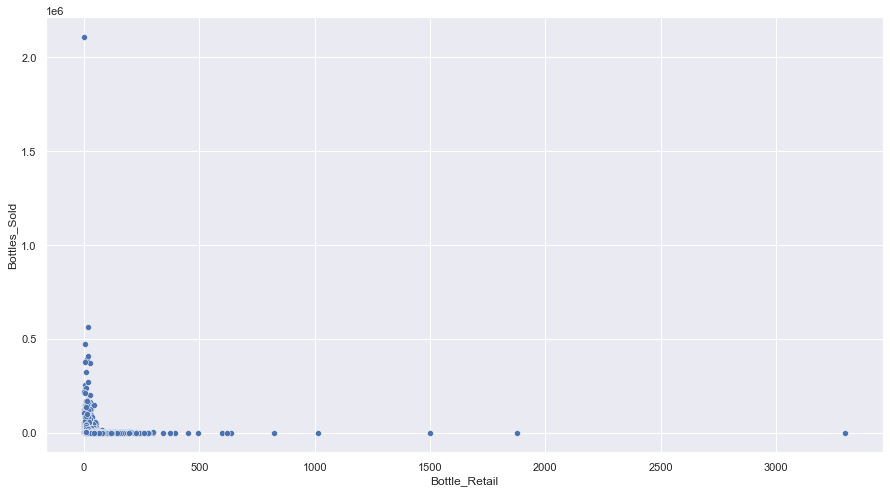

In [52]:
gph = sns.set(rc = {'figure.figsize':(15,8)})
gfg = sns.scatterplot(data=products, x='Bottle_Retail', y='Bottles_Sold')
# gfg.set_ylim(0, 80)

In [53]:
filt = products.Bottle_Retail > 1400
products[filt]

,Item_Number,Item_Description,Bottles_Sold,Num_Stores_Selling,Category Name,Bottle_Volume,Proof,State Bottle Cost,State Case Cost,Bottle_Retail,Category,Category_Name,New_Category_Name
1633,48725,Remy Martin Louis XIII,17,12,Imported Brandies,750,80.0,2198.89,2198.89,3298.34,1052100,Imported Brandies,Brandies
3323,917673,HA Double Eagle Very Rare,2,2,Straight Bourbon Whiskies,750,101.0,1000.00,1000.00,1500.00,1011200,Straight Bourbon Whiskies,Bourbon
3360,919976,HA OFC Bourbon 1995,10,10,Straight Bourbon Whiskies,750,90.0,1250.00,1250.00,1875.00,1011200,Straight Bourbon Whiskies,Bourbon


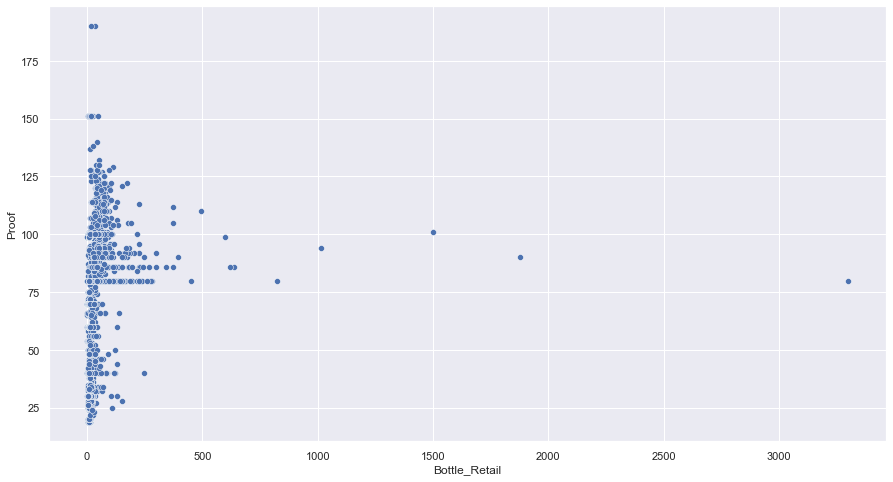

In [54]:
gph = sns.set(rc = {'figure.figsize':(15,8)})
gfg = sns.scatterplot(data=products, x='Bottle_Retail', y='Proof')

remove outliers

In [55]:
filt = products2.Bottle_Retail >  1400 #drop outliers of Bottle Retail

In [56]:
products2[filt]

,Item_Number,Item_Description,Bottles_Sold,Num_Stores_Selling,Category Name,Bottle_Volume,Proof,State Bottle Cost,State Case Cost,Bottle_Retail,Category,Category_Name,New_Category_Name
1633,48725,Remy Martin Louis XIII,17,12,Imported Brandies,750,80.0,2198.89,2198.89,3298.34,1052100,Imported Brandies,Brandies
3323,917673,HA Double Eagle Very Rare,2,2,Straight Bourbon Whiskies,750,101.0,1000.00,1000.00,1500.00,1011200,Straight Bourbon Whiskies,Bourbon
3360,919976,HA OFC Bourbon 1995,10,10,Straight Bourbon Whiskies,750,90.0,1250.00,1250.00,1875.00,1011200,Straight Bourbon Whiskies,Bourbon


In [57]:

products2 = products2[~filt]

In [58]:
products2.shape

(4468, 13)

In [59]:
filt2 = products2.Bottle_Volume > 3000 #drop outliers of Bottle Volume

In [60]:
products2 = products2[~filt2] 

In [61]:
products2.shape

(4465, 13)

In [62]:
filt3= products2.Item_Number == '64870'  #outlier of bottles sold

In [63]:
products2[filt3]

,Item_Number,Item_Description,Bottles_Sold,Num_Stores_Selling,Category Name,Bottle_Volume,Proof,State Bottle Cost,State Case Cost,Bottle_Retail,Category,Category_Name,New_Category_Name
2032,64870,Fireball Cinnamon Whiskey,2105088,893,Whiskey Liqueur,100,66.0,0.9,43.2,1.35,1081600,Whiskey Liqueur,Whiskey Liqueur


In [64]:
# products2[filt3]


products2 = products2[~filt3]

## write out products2

In [65]:
products2.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\products2_outliers_removed.csv')

## scale data for clustering

In [66]:
products2.shape

(4464, 13)

In [67]:
# cols_to_scale = ['Bottle_Volume', 'Bottle_Retail', 'Bottles_Sold','Proof']

In [68]:
scaler = StandardScaler()

In [69]:


products2[['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled','Proof_scaled' ]] = scaler.fit_transform\
                                           (products2[['Bottle_Volume', 'Bottle_Retail', 'Bottles_Sold','Proof']])
                                                   

products2[['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled','Proof_scaled' ]].describe()

,Bottle_Volume_scaled,Bottle_Retail_scaled,Bottles_Sold_scaled,Proof_scaled
count,4.464000e+03,4.464000e+03,4.464000e+03,4.464000e+03
mean,-1.548915e-15,-3.789034e-16,-7.782629e-16,-4.273414e-15
std,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00
min,-1.927046e+00,-7.098988e-01,-2.654476e-01,-2.635336e+00
25%,-1.006020e-01,-4.461909e-01,-2.633156e-01,-2.419137e-01
50%,-1.006020e-01,-2.404890e-01,-2.429391e-01,2.273848e-01
75%,-1.006020e-01,1.219266e-01,-1.166213e-01,5.089639e-01
max,4.027661e+00,2.394289e+01,2.282759e+01,5.389668e+00


In [70]:
# model = KMeans(n_clusters=3, random_state=42)

cluster_cols = ['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ,'Proof_scaled']


determine optimal number of clusters

In [71]:
from sklearn.metrics import silhouette_score

cluster_cols = ['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]

df_scaled = products2[cluster_cols]


for clust in range(2,11):
    model = KMeans(n_clusters=clust, random_state=42).fit(df_scaled)
    

    
    silhouette_avg = silhouette_score(df_scaled,model.labels_)
    print('number of clusters = ',clust,' ','silhouette score = ',silhouette_avg)

number of clusters =  2   silhouette score =  0.632029669015626
number of clusters =  3   silhouette score =  0.618943325566067
number of clusters =  4   silhouette score =  0.6452987236286545
number of clusters =  5   silhouette score =  0.5884464405702099
number of clusters =  6   silhouette score =  0.6016943487205195
number of clusters =  7   silhouette score =  0.6175593275965177
number of clusters =  8   silhouette score =  0.5346187332335217
number of clusters =  9   silhouette score =  0.5447154084779157
number of clusters =  10   silhouette score =  0.46801035411401065


In [72]:
inertia_scores = []

for clust in range(2,11):
    inertia = KMeans(n_clusters=clust, random_state=42)\
              .fit(df_scaled).inertia_
    inertia_scores.append(inertia)

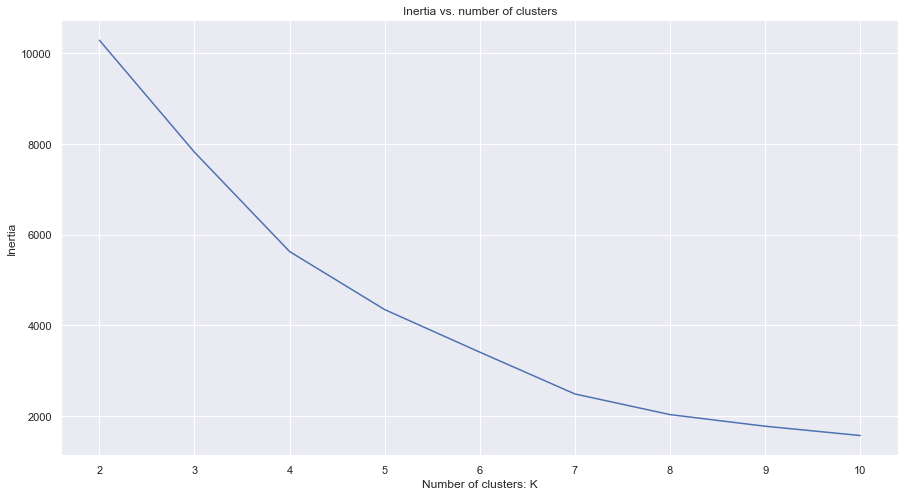

In [73]:

plt.plot(range(2,11), inertia_scores)
plt.title("Inertia vs. number of clusters")
plt.xlabel("Number of clusters: K")
plt.ylabel('Inertia')
plt.show()

get four clusters

In [74]:


cluster_cols = ['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]


model = KMeans(n_clusters=4, random_state=42)

model.fit(products2[cluster_cols])

products2['product_cluster'] = model.predict(products2[cluster_cols])

In [75]:
products2.head()

,Item_Number,Item_Description,Bottles_Sold,Num_Stores_Selling,Category Name,Bottle_Volume,Proof,State Bottle Cost,State Case Cost,Bottle_Retail,Category,Category_Name,New_Category_Name,Bottle_Volume_scaled,Bottle_Retail_scaled,Bottles_Sold_scaled,Proof_scaled,product_cluster
1,10006,Scoresby Rare Scotch,4619,197,Scotch Whiskies,750,80.0,5.13,61.56,7.70,1012200,Scotch Whiskies,Scotch,-0.100602,-0.546361,-0.076114,0.227385,0
2,100077,Kraken Rum w/ Tiki Glass,2679,136,Temporary & Specialty Packages,750,94.0,10.45,62.70,15.68,1701100,Temporary & Specialty Packages,Temporary & Specialty Packages,-0.100602,-0.351870,-0.155652,0.884403,0
3,10008,Scoresby Rare Scotch,12340,287,Scotch Whiskies,1750,80.0,10.50,63.00,15.75,1012200,Scotch Whiskies,Scotch,2.401375,-0.350164,0.240439,0.227385,2
4,10009,Scoresby Rare Scotch,1722,70,Scotch Whiskies,1000,80.0,6.74,80.88,10.11,1012200,Scotch Whiskies,Scotch,0.524892,-0.487624,-0.194888,0.227385,0
5,100148,Jack Daniels Single Barrel w/Snifter Glass,606,120,Temporary & Specialty Packages,750,94.0,27.59,165.54,41.39,1701100,Temporary & Specialty Packages,Temporary & Specialty Packages,-0.100602,0.274741,-0.240643,0.884403,0


In [76]:
products2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4464 entries, 1 to 4470
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Number           4464 non-null   object 
 1   Item_Description      4464 non-null   object 
 2   Bottles_Sold          4464 non-null   int32  
 3   Num_Stores_Selling    4464 non-null   int32  
 4   Category Name         4464 non-null   object 
 5   Bottle_Volume         4464 non-null   int64  
 6   Proof                 4464 non-null   float64
 7   State Bottle Cost     4464 non-null   float64
 8   State Case Cost       4464 non-null   float64
 9   Bottle_Retail         4464 non-null   float64
 10  Category              4464 non-null   object 
 11  Category_Name         4464 non-null   object 
 12  New_Category_Name     4464 non-null   object 
 13  Bottle_Volume_scaled  4464 non-null   float64
 14  Bottle_Retail_scaled  4464 non-null   float64
 15  Bottles_Sold_scaled  

In [77]:
products2['Bottle_Volume_liters'] = products2.Bottle_Volume / 1000

In [78]:
# prod_dict = {0:'Volume_For_Dollar', 1:'Everything_Else', 2:'Popular_Bottles',3:'High End'}

In [79]:
# products2[['product_cluster']].apply(lambda p: prod_dict[p[0]],axis=1)

In [80]:
# products2['cluster_name'] = products2['product_cluster'].apply(lambda p: prod_dict[p])

In [81]:
# products2.cluster_name

In [82]:
products2['revenue'] = products2.Bottle_Retail * products2.Bottles_Sold

In [83]:
# pd.options.display.float_format = '{:.2f}'.format

In [84]:
products2.groupby(['product_cluster']).agg({'Bottle_Volume' : 'mean', 'Bottle_Retail':'mean','Bottles_Sold':'mean','revenue':'mean','Proof':'mean' })

,Bottle_Volume,Bottle_Retail,Bottles_Sold,revenue,Proof
product_cluster,,,,,
0,678.604585,26.530033,4268.097115,6.149389e+04,76.141680
1,752.906977,236.195000,117.046512,2.185462e+04,87.232558
2,1754.295154,23.249273,8943.638767,1.662277e+05,64.255507
3,760.714286,13.957143,196842.380952,2.685437e+06,77.023810


In [85]:
products2.groupby(['product_cluster']).agg({'Bottle_Volume' :['count','min','max','std', 'median', 'mean'], 'Bottle_Retail':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'],'revenue':['sum']})

Bottle_Volume                                               \
                        count   min   max         std  median         mean   
product_cluster                                                              
0                        3882    20  1200  242.213670   750.0   678.604585   
1                          86    50  2250  248.921751   750.0   752.906977   
2                         454  1750  2400   45.288490  1750.0  1754.295154   
3                          42    50  1750  461.774905   750.0   760.714286   

                Bottle_Retail                                           \
                          min      max         std  median        mean   
product_cluster                                                          
0                        0.99   129.24   21.168675   20.28   26.530033   
1                      131.24  1012.50  150.482581  184.87  236.195000   
2                        7.34    89.99   15.762859   17.25   23.249273   
3                        1.34    42.00    9.832504   11.99   13.957143   

                Bottles_Sold                                                  \
                         min     max            std    median           mean   
product_cluster                                                                
0                          1   97514   11005.105822     467.5    4268.097115   
1                          1    2319     324.151341      22.5     117.046512   
2                          3  108712   17253.510529    2039.5    8943.638767   
3                     101445  563260  110826.287590  145871.5  196842.380952   

                      revenue  
                          sum  
product_cluster                
0                2.387193e+08  
1                1.879498e+06  
2                7.546738e+07  
3                1.127884e+08

In [86]:
products2['price_per_ml'] = products2['Bottle_Retail'] / products2['Bottle_Volume']

In [87]:
products2.groupby(['product_cluster']).agg({'Proof':['min','max', 'median', 'mean']})

Proof                         
                  min    max median       mean
product_cluster                               
0                19.0  190.0   80.0  76.141680
1                28.0  122.0   86.0  87.232558
2                19.0  190.0   80.0  64.255507
3                42.0   99.0   80.0  77.023810

In [92]:
products2.groupby(['product_cluster']).agg({'revenue':['sum'],'price_per_ml':['min','max','std', 'median', 'mean'], 'Bottle_Volume' :['count','min','max','std', 'median', 'mean'], 'Bottle_Retail':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max', 'median', 'mean','sum']})

revenue price_per_ml                                \
                          sum          min       max       std    median   
product_cluster                                                            
0                2.387193e+08     0.003200  2.433600  0.183456  0.032000   
1                1.879498e+06     0.137137  4.314600  0.683224  0.249993   
2                7.546738e+07     0.004194  0.051423  0.008757  0.009857   
3                1.127884e+08     0.005960  0.129000  0.021071  0.017795   

                          Bottle_Volume                          ...  \
                     mean         count   min   max         std  ...   
product_cluster                                                  ...   
0                0.070611          3882    20  1200  242.213670  ...   
1                0.443467            86    50  2250  248.921751  ...   
2                0.013202           454  1750  2400   45.288490  ...   
3                0.022235            42    50  1750  461.774905  ...   

                Bottle_Retail                                           \
                          min      max         std  median        mean   
product_cluster                                                          
0                        0.99   129.24   21.168675   20.28   26.530033   
1                      131.24  1012.50  150.482581  184.87  236.195000   
2                        7.34    89.99   15.762859   17.25   23.249273   
3                        1.34    42.00    9.832504   11.99   13.957143   

                Bottles_Sold                                             
                         min     max    median           mean       sum  
product_cluster                                                          
0                          1   97514     467.5    4268.097115  16568753  
1                          1    2319      22.5     117.046512     10066  
2                          3  108712    2039.5    8943.638767   4060412  
3                     101445  563260  145871.5  196842.380952   8267380  

[4 rows x 22 columns]

In [94]:
products2.columns

Index(['Item_Number', 'Item_Description', 'Bottles_Sold', 'Num_Stores_Selling',
       'Category Name', 'Bottle_Volume', 'Proof', 'State Bottle Cost',
       'State Case Cost', 'Bottle_Retail', 'Category', 'Category_Name',
       'New_Category_Name', 'Bottle_Volume_scaled', 'Bottle_Retail_scaled',
       'Bottles_Sold_scaled', 'Proof_scaled', 'product_cluster',
       'Bottle_Volume_liters', 'revenue', 'price_per_ml'],
      dtype='object')

In [98]:
products2.loc[(products2.product_cluster == 1) & (products2.Bottle_Volume < 750),['Item_Number', 'Item_Description', 'Bottle_Volume','Bottle_Retail','Bottles_Sold', 'Num_Stores_Selling']]
            

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold,Num_Stores_Selling
274,15178,WhistlePig 10YR Mini,50,215.73,47,39
587,258,RumChata GoChatas,100,150.00,250,75
815,28894,Bombay Bramble Mini,50,180.00,37,35
1127,37273,E.T. 51 Premium Vodka Mini,50,171.36,48,37


In [89]:
products2.groupby(['product_cluster']).agg({'price_per_ml':['min','max','std', 'median', 'mean']})

price_per_ml                                        
                         min       max       std    median      mean
product_cluster                                                     
0                   0.003200  2.433600  0.183456  0.032000  0.070611
1                   0.137137  4.314600  0.683224  0.249993  0.443467
2                   0.004194  0.051423  0.008757  0.009857  0.013202
3                   0.005960  0.129000  0.021071  0.017795  0.022235

### Name clusters

In [90]:
stop

NameError: name 'stop' is not defined

In [99]:
prod_dict = {0:'Everything_Else', 1:'High_End', 3:'Popular_Bottles', 2:'Volume_For_Dollar'}

In [100]:
products2[['product_cluster']].apply(lambda p: prod_dict[p[0]],axis=1)

1         Everything_Else
2         Everything_Else
3       Volume_For_Dollar
4         Everything_Else
5         Everything_Else
              ...        
4466      Everything_Else
4467      Everything_Else
4468      Everything_Else
4469      Everything_Else
4470      Everything_Else
Length: 4464, dtype: object

In [101]:
products2['cluster_name'] = products2[['product_cluster']].apply(lambda p: prod_dict[p[0]],axis=1)

In [102]:
products2.groupby(['cluster_name']).agg({'Bottle_Volume_liters' :['min','max', 'mean'], 'Bottle_Retail':['min','max', 'mean'],'Bottles_Sold':['min','max', 'mean'] })

Bottle_Volume_liters                 Bottle_Retail           \
                                   min   max      mean           min      max   
cluster_name                                                                    
Everything_Else                   0.02  1.20  0.678605          0.99   129.24   
High_End                          0.05  2.25  0.752907        131.24  1012.50   
Popular_Bottles                   0.05  1.75  0.760714          1.34    42.00   
Volume_For_Dollar                 1.75  2.40  1.754295          7.34    89.99   

                              Bottles_Sold                         
                         mean          min     max           mean  
cluster_name                                                       
Everything_Else     26.530033            1   97514    4268.097115  
High_End           236.195000            1    2319     117.046512  
Popular_Bottles     13.957143       101445  563260  196842.380952  
Volume_For_Dollar   23.249273            3  108712    8943.638767

In [ ]:
# products2['price_per_ml'] = products2['Bottle_Retail'] / products2['Bottle_Volume']

In [103]:
products2.groupby(['cluster_name']).agg({'Bottle_Volume':'nunique'})

,Bottle_Volume
cluster_name,
Everything_Else,17
High_End,6
Popular_Bottles,7
Volume_For_Dollar,4


In [ ]:
# products2['revenue'] = products2.Bottles_Sold * products2.Bottle_Retail


In [ ]:
df = products2.groupby(['cluster_name']).agg({'revenue':'sum'})
df.style.format("{:.0f}")


In [104]:
from freq_pd import proc_freq

In [105]:
proc_freq(products2,'cluster_name')

,cluster_name,Frequency,Percent,Cumulative_Frequency,Cumulative_Percent
0,Everything_Else,3882,86.96,3882,86.96
1,High_End,86,1.93,3968,88.89
2,Popular_Bottles,42,0.94,4010,89.83
3,Volume_For_Dollar,454,10.17,4464,100.00


In [106]:
products2.groupby(['cluster_name']).agg({'price_per_ml':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'],'Num_Stores_Selling':['min','max','std', 'median', 'mean'] })

price_per_ml                                          \
                           min       max       std    median      mean   
cluster_name                                                             
Everything_Else       0.003200  2.433600  0.183456  0.032000  0.070611   
High_End              0.137137  4.314600  0.683224  0.249993  0.443467   
Popular_Bottles       0.005960  0.129000  0.021071  0.017795  0.022235   
Volume_For_Dollar     0.004194  0.051423  0.008757  0.009857  0.013202   

                  Bottles_Sold                                   \
                           min     max            std    median   
cluster_name                                                      
Everything_Else              1   97514   11005.105822     467.5   
High_End                     1    2319     324.151341      22.5   
Popular_Bottles         101445  563260  110826.287590  145871.5   
Volume_For_Dollar            3  108712   17253.510529    2039.5   

                                 Num_Stores_Selling                            \
                            mean                min   max         std  median   
cluster_name                                                                    
Everything_Else      4268.097115                  1  1551  186.072416    45.0   
High_End              117.046512                  1   212   42.383423     5.0   
Popular_Bottles    196842.380952                 73  1725  486.579562  1285.5   
Volume_For_Dollar    8943.638767                  1  1199  192.462092    79.0   

                                
                          mean  
cluster_name                    
Everything_Else     113.366564  
High_End             29.302326  
Popular_Bottles    1124.476190  
Volume_For_Dollar   152.900881

In [ ]:
products2.groupby(['cluster_name']).agg({'revenue':['sum'],'Bottle_Volume':['nunique','min','max','median'],'price_per_ml':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'],'Num_Stores_Selling':['min','max','std', 'median', 'mean'] })

In [107]:
products2.groupby(['cluster_name']).agg({'revenue':['sum'],'Bottle_Volume':['nunique','min','max','median'],'price_per_ml':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'],'Num_Stores_Selling':['min','max','std', 'median', 'mean'] })

revenue Bottle_Volume                      \
                            sum       nunique   min   max  median   
cluster_name                                                        
Everything_Else    2.387193e+08            17    20  1200   750.0   
High_End           1.879498e+06             6    50  2250   750.0   
Popular_Bottles    1.127884e+08             7    50  1750   750.0   
Volume_For_Dollar  7.546738e+07             4  1750  2400  1750.0   

                  price_per_ml                                          \
                           min       max       std    median      mean   
cluster_name                                                             
Everything_Else       0.003200  2.433600  0.183456  0.032000  0.070611   
High_End              0.137137  4.314600  0.683224  0.249993  0.443467   
Popular_Bottles       0.005960  0.129000  0.021071  0.017795  0.022235   
Volume_For_Dollar     0.004194  0.051423  0.008757  0.009857  0.013202   

                  Bottles_Sold                                   \
                           min     max            std    median   
cluster_name                                                      
Everything_Else              1   97514   11005.105822     467.5   
High_End                     1    2319     324.151341      22.5   
Popular_Bottles         101445  563260  110826.287590  145871.5   
Volume_For_Dollar            3  108712   17253.510529    2039.5   

                                 Num_Stores_Selling                            \
                            mean                min   max         std  median   
cluster_name                                                                    
Everything_Else      4268.097115                  1  1551  186.072416    45.0   
High_End              117.046512                  1   212   42.383423     5.0   
Popular_Bottles    196842.380952                 73  1725  486.579562  1285.5   
Volume_For_Dollar    8943.638767                  1  1199  192.462092    79.0   

                                
                          mean  
cluster_name                    
Everything_Else     113.366564  
High_End             29.302326  
Popular_Bottles    1124.476190  
Volume_For_Dollar   152.900881

In [108]:
pd.set_option('display.max_columns', None)
products2.groupby(['cluster_name']).agg({'Item_Number':['nunique'],'revenue':['sum'],'Bottle_Volume':['count','nunique','min','max','median','std'],'Bottle_Retail':['min','max','std', 'median', 'mean'],'price_per_ml':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'],'Num_Stores_Selling':['min','max','std', 'median', 'mean'] })

Item_Number       revenue Bottle_Volume                      \
                      nunique           sum         count nunique   min   max   
cluster_name                                                                    
Everything_Else          3882  2.387193e+08          3882      17    20  1200   
High_End                   86  1.879498e+06            86       6    50  2250   
Popular_Bottles            42  1.127884e+08            42       7    50  1750   
Volume_For_Dollar         454  7.546738e+07           454       4  1750  2400   

                                      Bottle_Retail                       \
                   median         std           min      max         std   
cluster_name                                                               
Everything_Else     750.0  242.213670          0.99   129.24   21.168675   
High_End            750.0  248.921751        131.24  1012.50  150.482581   
Popular_Bottles     750.0  461.774905          1.34    42.00    9.832504   
Volume_For_Dollar  1750.0   45.288490          7.34    89.99   15.762859   

                                      price_per_ml                      \
                   median        mean          min       max       std   
cluster_name                                                             
Everything_Else     20.28   26.530033     0.003200  2.433600  0.183456   
High_End           184.87  236.195000     0.137137  4.314600  0.683224   
Popular_Bottles     11.99   13.957143     0.005960  0.129000  0.021071   
Volume_For_Dollar   17.25   23.249273     0.004194  0.051423  0.008757   

                                      Bottles_Sold                         \
                     median      mean          min     max            std   
cluster_name                                                                
Everything_Else    0.032000  0.070611            1   97514   11005.105822   
High_End           0.249993  0.443467            1    2319     324.151341   
Popular_Bottles    0.017795  0.022235       101445  563260  110826.287590   
Volume_For_Dollar  0.009857  0.013202            3  108712   17253.510529   

                                           Num_Stores_Selling        \
                     median           mean                min   max   
cluster_name                                                          
Everything_Else       467.5    4268.097115                  1  1551   
High_End               22.5     117.046512                  1   212   
Popular_Bottles    145871.5  196842.380952                 73  1725   
Volume_For_Dollar    2039.5    8943.638767                  1  1199   

                                                    
                          std  median         mean  
cluster_name                                        
Everything_Else    186.072416    45.0   113.366564  
High_End            42.383423     5.0    29.302326  
Popular_Bottles    486.579562  1285.5  1124.476190  
Volume_For_Dollar  192.462092    79.0   152.900881

In [ ]:
products2.cluster_name.value_counts()

In [ ]:
# proc_freq(products2.loc[products2.cluster_name == 'Everything_Else'],'New_Category_Name')
products2.loc[products2.cluster_name == 'Everything_Else']['New_Category_Name'].value_counts()/3833*100

In [ ]:
# proc_freq(products2.loc[products2.cluster_name == 'Volume_For_Dollar']'New_Category_Name')
products2.loc[products2.cluster_name == 'Volume_For_Dollar']['New_Category_Name'].value_counts()/454*100

In [ ]:
products2.loc[products2.cluster_name == 'High End']['New_Category_Name'].value_counts()/133*100

In [ ]:
products2.loc[products2.cluster_name == 'Popular_Bottles']['New_Category_Name'].value_counts()/ 42*100

In [ ]:
# df.sort_values(by=['Population'], ascending=False)
products2.sort_values(by=['revenue'], ascending=False)
products2[['cluster_name','revenue','Item_Description','Bottle_Retail','Bottle_Volume']].sort_values(by=['revenue'], ascending=False)
# products2.style.format("{:.0f}")


In [ ]:
products2.loc[products2.product_cluster==3,:]['Bottle_Retail'].max()

In [ ]:
# products2.loc[products2.product_cluster==1,:]

In [109]:
products_out=products2[['Category','New_Category_Name','Item_Number','Item_Description','Bottle_Volume','Bottle_Retail', 'Bottles_Sold','cluster_name','revenue','Num_Stores_Selling']]

In [ ]:
# check

In [110]:
products_out.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\product_clusters.csv')